# Anomalies in RU2020 vote

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('cleaned.csv')
df['turnout'] = df['given']/np.maximum(1, df['nominal'])
df['support'] = df['yes']/np.maximum(1, df['given'])
df.head()

,region,tik,uik,nominal,given,received,damaged,yes,no,turnout,support
0,Адыгея,1 Адыгейская,1,2277,1925,1925,0,1749,176,0.845411,0.908571
1,Адыгея,1 Адыгейская,2,2694,2290,2290,7,2117,166,0.850037,0.924454
2,Адыгея,1 Адыгейская,3,2865,2441,2441,11,2171,259,0.852007,0.889390
3,Адыгея,1 Адыгейская,4,2054,1669,1669,8,1381,280,0.812561,0.827442
4,Адыгея,1 Адыгейская,5,714,607,607,1,473,133,0.850140,0.779242


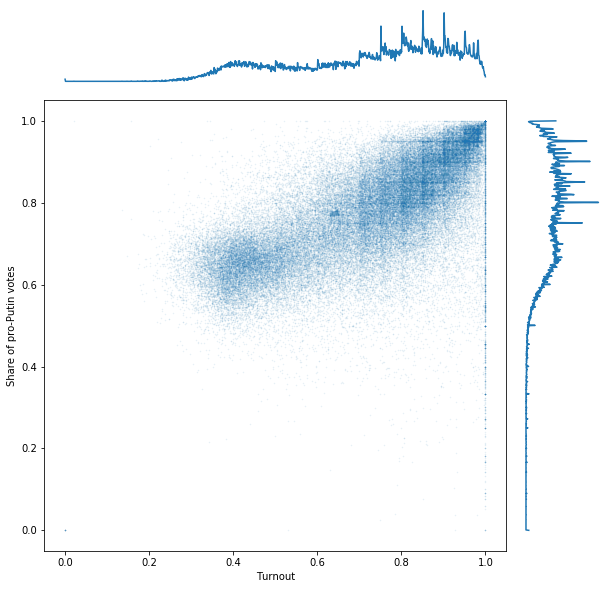

In [72]:
f = plt.figure(figsize=(10,10))
gs = f.add_gridspec(6, 6)

ax = f.add_subplot(gs[0, :-1])
x = np.histogram(df['turnout'].values, bins=1000, range=(0,1))
ax.plot(x[1][:-2], x[0][:-1]); # Very last bin is full of 100% for tiny polling points
ax.axis('off')

ax = f.add_subplot(gs[1:, -1])
x = np.histogram(df['support'].values, bins=1000, range=(0,1))
ax.plot(x[0][:], x[1][:-1]); # Very last bin is full of 100% for tiny polling points
ax.axis('off')

ax = f.add_subplot(gs[1:, :-1])
ax.plot(df['turnout'], df['support'], '.', markersize=1, alpha=0.1);
plt.xlabel('Turnout');
plt.ylabel('Share of pro-Putin votes');

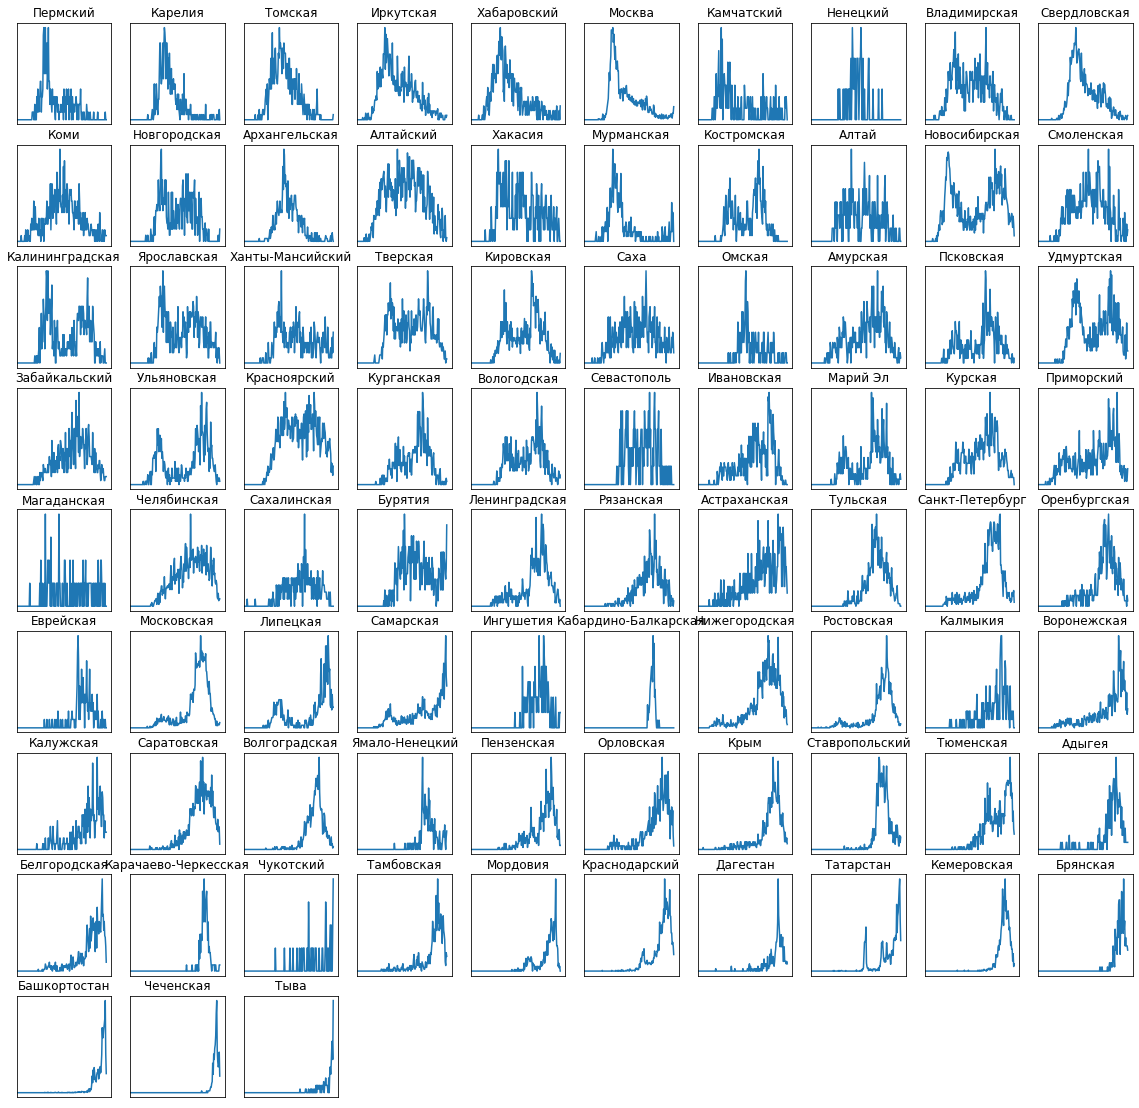

In [73]:
# Distributions by region
dfsum = df.groupby('region').agg({'turnout': [np.mean]})
ind = np.argsort(dfsum.iloc[:,0].values) # Indices from lowest mean turnout to highest

regions = np.unique(df['region'].values)[ind]

plt.figure(figsize=(20,22))
for i in range(len(regions)):
    region = regions[i]
    x = np.histogram(df['turnout'][df['region']==region].values, bins=200, range=(0,1))
    plt.subplot(10, 10, i+1);
    plt.plot(x[1][:-2], x[0][:-1]/np.max(x[0][:-1]));
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0.1)
    plt.title(region)

In [80]:
# An index of how peculiar this number is. Anti-peculiar numbers are slightly. Most peculiar are ==1 
nearby = ((np.floor(np.ceil((df['received'].values+1)/df['nominal']*100)/100*df['nominal'])==df['received'].values+1)*1 +
          (np.floor(np.ceil((df['received'].values+2)/df['nominal']*100)/100*df['nominal'])==df['received'].values+2)*1 +
          (np.floor(np.ceil((df['received'].values-1)/df['nominal']*100)/100*df['nominal'])==df['received'].values-1)*1 +
          (np.floor(np.ceil((df['received'].values-2)/df['nominal']*100)/100*df['nominal'])==df['received'].values-2)*1)
possible = 5-3+np.minimum(np.minimum(3, df['nominal'].values - df['received'].values), df['received'].values)

funny = (np.floor(np.ceil((df['received'].values)/df['nominal']*100)/100*df['nominal'])==df['received'])*1 - nearby/possible
df['funny_turnout'] = funny

# An index of how peculiar this number is. Anti-peculiar numbers are slightly. Most peculiar are ==1 
nearby = ((np.floor(np.ceil((df['yes'].values+1)/df['given']*100)/100*df['given'])==df['yes'].values+1)*1 +
          (np.floor(np.ceil((df['yes'].values+2)/df['given']*100)/100*df['given'])==df['yes'].values+2)*1 +
          (np.floor(np.ceil((df['yes'].values-1)/df['given']*100)/100*df['given'])==df['yes'].values-1)*1 +
          (np.floor(np.ceil((df['yes'].values-2)/df['given']*100)/100*df['given'])==df['yes'].values-2)*1)
possible = 5-3+np.minimum(np.minimum(3, df['given'].values - df['yes'].values), df['yes'].values)

funny = (np.floor(np.ceil((df['yes'].values)/df['given']*100)/100*df['given'])==df['yes'])*1 - nearby/possible
df['funny_support'] = funny

df.iloc[12000:]

#df.loc[df['funny_support']==1]

,region,tik,uik,nominal,given,received,damaged,yes,no,turnout,support,funny_turnout,funny_support
12000,Татарстан,56 Сабинская,2488,156,150,150,0,141,9,0.961538,0.940000,-0.800000,0.6
12001,Татарстан,56 Сабинская,2489,653,636,636,0,600,36,0.973966,0.943396,0.000000,0.0
12002,Татарстан,56 Сабинская,2490,627,610,610,0,575,35,0.972887,0.942623,-0.200000,-0.2
12003,Татарстан,56 Сабинская,2491,346,339,339,0,319,20,0.979769,0.941003,1.000000,-0.2
12004,Татарстан,56 Сабинская,2492,205,199,199,0,187,12,0.970732,0.939698,-0.400000,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,Ямало-Ненецкий,13 Ямальская,1309,1675,1432,1432,0,1224,208,0.854925,0.854749,0.000000,0.0
85149,Ямало-Ненецкий,13 Ямальская,1310,1026,1026,1026,4,886,136,1.000000,0.863548,1.000000,0.0
85150,Ямало-Ненецкий,13 Ямальская,1311,1009,1009,1009,5,872,132,1.000000,0.864222,1.000000,0.0
85151,Ямало-Ненецкий,13 Ямальская,1312,3156,3156,3155,6,2694,455,1.000000,0.853612,-0.333333,0.0


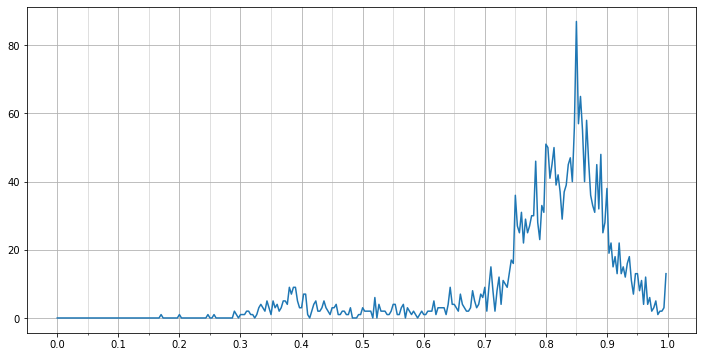

In [81]:
# One region of interest

df1 = df[:][df.region == 'Ростовская']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
x = np.histogram(df1['turnout'].values, bins=300, range=(0,1))
plt.plot(x[1][:-1], x[0])
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_xticks(np.arange(0,1,0.05), minor=True)
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=1)

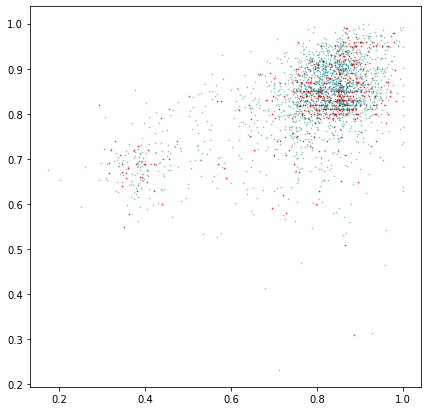

In [90]:
# Color strange (round-percent) values red
plt.figure(figsize=(7,7))
plt.plot(df1['turnout'][df1['funny_support']!=1], df1['support'][df1['funny_support']!=1], '.', 
         markersize=1, alpha=0.5, color='teal');
plt.plot(df1['turnout'][df1['funny_support']==1], df1['support'][df1['funny_support']==1], '.', 
         markersize=1, alpha=1, color='red');

In [6]:
def p_exact_match(val):
    """Calculates a probability of getting an exact % match for this baseline number"""
    p_round = len(np.unique(np.round(val*np.arange(0,100)/100)))/(val+1)
    p_floor = len(np.unique(np.floor(val*np.arange(0,100)/100)))/(val)
    return p_round, p_floor

p_round, p_floor = p_exact_match(200)
print(f"P round, floor: {p_round:.3f}, {p_floor:.3f}")

P round, floor: 0.498, 0.500


In [7]:
def check_match(x, y, floor=True, verbose=False):
    """Calculates if y is an exact %-match for x."""
    if floor: # Use floor instead of round
        pr = np.ceil(y/x*100)
        res = (y == int(np.floor(x*pr/100)))
        if verbose:
            print(f"pr={int(pr)}, {x}*{int(pr)}% = {int(np.floor(x*pr/100))}")
            if not res:
                print(f"pr={int(pr)-1}, {x}*{int(pr)-1}% = {int(np.floor(x*(pr-1)/100))}")
    else:
        pr = np.round(y/x*100)
        res = (y == int(np.round(x*pr/100)))
        if verbose:
            if res:
                print(f"pr={int(pr)}, {x}*{int(pr)}% = {int(np.round(x*pr/100))}")
            else:
                print(f"pr={int(pr)-1}, {x}*{int(pr)-1}% = {int(np.round(x*(pr-1)/100))}")
                print(f"pr={int(pr)}, {x}*{int(pr)}% = {int(np.round(x*pr/100))}")
                print(f"pr={int(pr)+1}, {x}*{int(pr)+1}% = {int(np.round(x*(pr+1)/100))}")
    return res

check_match(2244, 1762, floor=True, verbose=True)

pr=79, 2244*79% = 1772
pr=78, 2244*78% = 1750


False

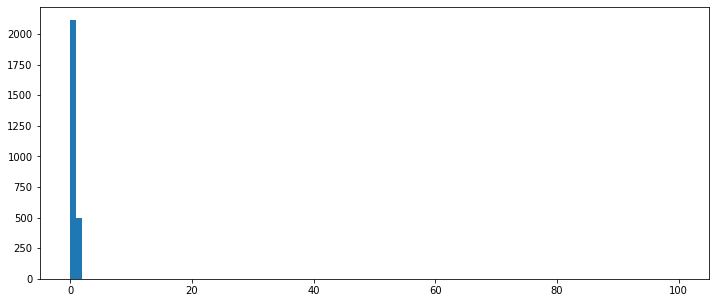

In [10]:
for key,val in df1.iterrows():
    df1.loc[key, 'fun_turnout'] = check_match(val.nominal, val.received)
exact_percent = df1[df1['fun_turnout'].notna()]['fun_turnout'].values
plt.figure(figsize=(12,5))
plt.hist(exact_percent, bins=np.arange(0,101,1));